In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# 绘图
import seaborn as sns
import matplotlib.pyplot as plt
# 因子分析
from sklearn import preprocessing
from factor_analyzer import FactorAnalyzer
import random

In [86]:
# 提取统计量数据，如果某一行有nan则直接删去
df_raw = pd.read_csv('stat_2.csv', index_col=0)
print(df_raw.shape)
df_raw = df_raw.dropna(axis=0, how='any')
df_raw.isnull().sum()
df_raw.shape

(4495, 18)


(3720, 18)

In [87]:
# 由于函数不能支持太多行的数据，因此只能先取部分数据来分析
# 找出一组kmo比较大的数据

# from factor_analyzer import FactorAnalyzer, calculate_kmo, calculate_bartlett_sphericity
# df1 = df_raw.sample(800,axis = 0)
# df1.sort_index(inplace=True)
# kmo_all,kmo_max = calculate_kmo(df1)
# print(kmo_max)
# df_max = df1 # 省略掉了找到更大的kmo时替换df_max的代码

In [88]:
# kmo_all,kmo_max = calculate_kmo(df_max)
# print(kmo_max) # 0.563

In [89]:
# df_max是取了目前发现的kmo最大的800条轨迹
df_max = pd.read_csv('kmo0563.csv',index_col=0)
df_max

,x,y,xV,t,yV,aXV,rPX,rFX,rTPX,rTFX,rPXV,rFXV,rTPXV,rTFXV,pH,fH,tPH,tFX
10126,187.12,4.04,39.633950,119,0.845126,30.111140,0.011680,0.006173,0.009502,0.057819,5.727740,4.220407,7.869086,4.362941,2.148058,4.068406,2.707194,0.549648
10168,166.99,3.78,35.688220,118,0.801610,30.111140,0.008335,0.026645,0.013470,0.043084,2.481498,1.744130,3.043287,12.222203,3.342892,1.007253,2.076555,1.731903
10172,175.00,3.55,34.452578,128,0.691797,30.111140,0.012240,0.035313,0.014226,0.027394,0.624231,1.256966,3.711260,9.499688,2.378834,0.790737,2.049562,1.671039
10309,108.44,4.18,27.084653,101,1.038317,30.111140,0.021950,0.057320,0.019198,0.010927,2.321721,2.669642,4.444464,3.175644,1.620587,0.595682,1.929110,3.837682
20155,211.02,3.06,36.381301,146,0.525753,29.563735,0.037161,0.006595,0.025878,0.005000,5.670188,5.830530,5.142696,2.585543,0.749536,4.774661,1.122137,5.693185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601169,127.79,3.70,30.427453,106,0.873774,29.365453,0.029369,0.009601,0.015387,0.031868,2.080327,2.551931,8.054623,7.492547,1.079887,3.977942,2.174147,1.580861
601182,181.18,2.65,31.895175,143,0.462378,29.365453,0.009506,0.007563,0.017364,0.038449,0.950802,0.885792,0.487438,4.095734,3.269049,4.184267,1.800197,1.000147
601254,124.65,2.47,34.245217,92,0.662283,29.365453,0.018114,0.005000,0.010125,0.005859,4.763311,6.156641,0.127609,3.114457,1.647824,7.945991,2.885636,5.484459
601292,123.89,3.69,28.727431,109,0.845688,29.365453,0.029933,0.009708,0.071528,0.017825,0.876089,2.244003,7.440459,7.481101,1.127736,3.200830,0.811678,1.593500


In [90]:
# 删去df_max的部分列来提高kmo
# df_max = pd.read_csv('kmo0563.csv',index_col=0)
# # 如何确定要删去的列：如下进行试探
# a = ['rFX', 'rTPX', 'rTFX', 'rPXV', 'rFXV', 'rTPXV', 'rTFXV', 'tPH', 'tFX']
# for i in range(0,10):
#     a1 = random.sample(sorted(a),1)
#     dftemp = df_max.drop(a1 + ['fH'],axis=1)
#     kmo_all,kmo = calculate_kmo(dftemp)
#     print(a1,kmo)

In [91]:
df = df_max.drop(['fH','y'],axis=1,inplace=False)
faa = FactorAnalyzer(6,rotation=None)
faa.fit(df)
var = faa.get_factor_variance()#给出贡献率
print(var)

# 得到特征值ev、特征向量v
ev,v=faa.get_eigenvalues()
print(ev)
print(v)

(array([3.38435293, 2.08570446, 1.83661202, 1.14679136, 0.93587403,
       0.87265446]), array([0.21152206, 0.13035653, 0.11478825, 0.07167446, 0.05849213,
       0.0545409 ]), array([0.21152206, 0.34187859, 0.45666684, 0.5283413 , 0.58683342,
       0.64137433]))
[3.63146035 2.34346807 2.08614946 1.38912689 1.24654754 1.18274297
 0.9137635  0.80556594 0.64099047 0.47093076 0.37459643 0.28039592
 0.22668313 0.2056163  0.18955652 0.01240575]
[ 3.3844674   2.08571     1.8366394   1.14689527  0.93665993  0.87275361
  0.33647444  0.11827303  0.04622416  0.03477538 -0.00435681 -0.0190104
 -0.05451283 -0.07045788 -0.13660659 -0.25193885]


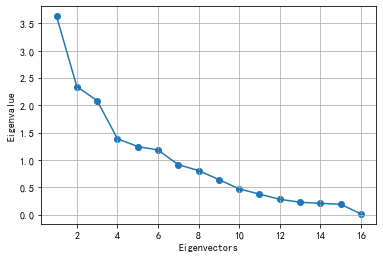

In [92]:
 # 同样的数据绘制散点图和折线图
plt.scatter(range(1, df.shape[1] + 1), ev)
plt.plot(range(1, df.shape[1] + 1), ev)
 
# 显示图的标题和xy轴的名字
# 最好使用英文，中文可能乱码
plt.xlabel("Eigenvectors")
plt.ylabel("Eigenvalue")

plt.grid()  # 显示网格
plt.savefig('Eigenvalue.png')
plt.show()  # 显示图形

In [93]:
# 因子旋转
# 选择方式： varimax 方差最大化
# 选择固定因子为 6 个
faa_two = FactorAnalyzer(6,rotation='varimax')
faa_two.fit(df)

FactorAnalyzer(n_factors=6, rotation='varimax', rotation_kwargs={})

In [94]:
# 公因子方差
faa_two.get_communalities()
pd.DataFrame(faa_two.get_communalities(),index=df.columns)

,0
x,0.963340
xV,0.897097
t,0.957470
yV,0.673020
aXV,0.425770
rPX,0.845132
rFX,0.187157
rTPX,0.651472
rTFX,0.921200
rPXV,0.996394


In [95]:
# 展示因子荷载矩阵
pd.DataFrame(faa_two.loadings_,index=df.columns)

,0,1,2,3,4,5
x,0.694074,0.646562,-0.032192,0.103204,-0.060090,0.219686
xV,0.886393,-0.076764,0.005411,0.096805,-0.049028,0.306119
t,-0.023542,0.975255,-0.051526,0.033398,-0.044962,0.000657
yV,0.055020,-0.808180,0.085674,-0.002293,0.068278,-0.069503
aXV,0.636164,0.016255,-0.093358,0.088720,-0.063958,0.011119
rPX,-0.286780,-0.043895,0.030446,-0.181557,0.850417,-0.062158
rFX,-0.317090,-0.034886,0.265842,0.037665,0.005056,-0.115228
rTPX,-0.259948,-0.042222,-0.053801,-0.700944,0.249710,-0.159827
rTFX,-0.177464,-0.050770,0.937634,0.058396,-0.067468,-0.003023
rPXV,0.096589,0.057638,-0.081595,0.026447,-0.079516,0.984917


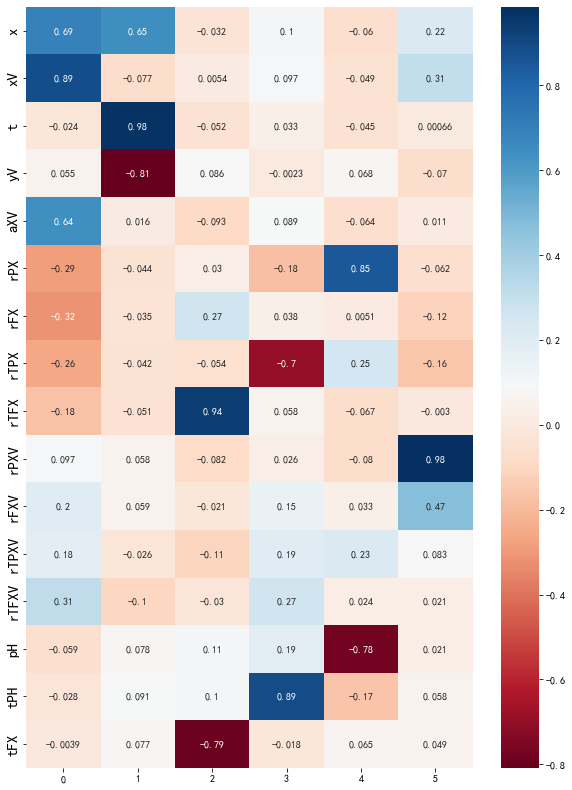

In [96]:
# 绘制因子荷载矩阵
df1 = pd.DataFrame(np.abs(faa_two.loadings_),index=df.columns)
df2 = pd.DataFrame(faa_two.loadings_,index=df.columns)

# 解决中文显示问题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 绘图
plt.figure(figsize = (10,14))
ax = sns.heatmap(df2, annot=True, cmap="RdBu")
 
# 设置y轴字体大小
ax.yaxis.set_tick_params(labelsize=15)
 
# 设置y轴标签
 
# 保存图片
plt.savefig("factorAnalysis_2.png", dpi=100)

# 显示图片
plt.show()

In [97]:
# 计算因子得分（回归方法）（系数矩阵的逆乘以因子载荷矩阵）
f_corr = df.corr()# 皮尔逊相关系数
X1 = np.mat(f_corr)
X1 = np.linalg.inv(X1)
factor_score_weight = np.dot(X1, faa_two.loadings_)
factor_score_weight = pd.DataFrame(factor_score_weight)
col = []
for i in range(6):
    col.append("factor" + str(i + 1))
factor_score_weight.columns = col
factor_score_weight.index = f_corr.columns
print("因子得分：\n", factor_score_weight)

因子得分：
         factor1   factor2   factor3   factor4   factor5   factor6
x      1.053502  0.251294  0.410516 -0.154902  0.167383 -0.055493
xV     0.077232 -0.091486 -0.149186  0.051289  0.005724 -0.019930
t     -0.590073  0.751370 -0.213120  0.069220 -0.054533 -0.036806
yV     0.068772 -0.086270  0.010710  0.027679  0.004858 -0.038365
aXV    0.116159 -0.031976  0.031334  0.018851  0.021360 -0.032414
rPX   -0.072454  0.029436  0.073367  0.069399  0.722542  0.079557
rFX   -0.037216 -0.000235  0.022314  0.013191 -0.014980 -0.003370
rTPX  -0.008050  0.009171  0.013140 -0.204594  0.004830 -0.004603
rTFX  -0.038218  0.049141  0.863024 -0.054315  0.015318  0.122095
rPXV  -0.281047 -0.021514 -0.016265 -0.104159 -0.028698  1.055436
rFXV   0.046835 -0.012478 -0.007993  0.077295  0.038829 -0.030381
rTPXV  0.077796 -0.021227 -0.018803  0.041610  0.071906 -0.025578
rTFXV  0.007946 -0.027284  0.006091  0.080658  0.061514  0.091292
pH    -0.033354 -0.031825 -0.000515 -0.049617 -0.304200 -0.009840
tPH

In [134]:
if('y' in df_raw.columns):
    df_raw.drop(['fH','y'],axis=1,inplace=True)
print(type(faa_two.loadings_))
sample = preprocessing.scale(df_raw)
print(type(sample))
mat = np.array(faa_two.loadings_)
# print(sample)
# print(faa_two.loadings_)
re = np.dot(sample,mat)
#print(pd.DataFrame(faa_two.transform(df_raw.iloc[0:5])))
print(np.shape(sample),np.shape(faa_two.loadings_))
#re_1 = preprocessing.scale(re)
print(re)
sum0 = 0
sum1 = 0
for i in range(0,16):
    sum0 += sample[0][i] * mat[i][0]
    sum1 += sample[0][i] * mat[i][1]
print(sum0)
print(sum1)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(3720, 16) (16, 6)
[[ 4.10543256e-01 -2.60015743e+00  2.74350113e+00  3.11587145e+00
  -8.00629950e-01 -1.31240137e+00]
 [ 2.14001525e+00  1.53763260e+00 -3.03417103e+00 -3.31974906e-01
  -5.42690519e-01  5.22034100e-01]
 [ 3.59576651e-01 -1.85237743e-03 -2.52660641e+00 -2.57643412e+00
   1.54845133e+00 -7.42875038e-01]
 ...
 [ 1.38274665e+00  4.56399603e-01 -6.17367613e-01  2.64134709e+00
  -3.15271099e+00 -5.98858989e-01]
 [-1.34483921e-01 -1.22205729e+00  2.53640329e-02  1.63801096e-01
  -2.11210509e+00  6.45684357e-01]
 [ 4.98653191e-01  7.58229568e+00 -1.86406715e+00 -1.70978845e-01
  -2.01070705e+00  3.49295501e+00]]
0.4105432560119313
-2.600157429242564


In [159]:
# 提取原数据到因子的成分矩阵
a0 = faa_two.transform([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
for i in range(0,16):
    arr = [[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]
    arr[0][i] = 1
    a1 = (faa_two.transform(arr) - \
        faa_two.transform([[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]]))
    a0 = np.concatenate([a0,a1])
a0

[[-0.04372954  0.00044339 -0.09974807  0.025143    0.00342733  0.02406373]]


array([[-2.40076764e+00, -3.96965123e+00, -1.28389614e+00,
        -1.37305389e+00, -1.64628777e+00, -7.18776067e-01],
       [ 2.82782755e-02,  6.74527644e-03,  1.10191265e-02,
        -4.15791274e-03,  4.49291813e-03, -1.48954337e-03],
       [ 1.45903110e-02, -1.72832093e-02, -2.81835342e-02,
         9.68936058e-03,  1.08132569e-03, -3.76502825e-03],
       [-2.44680889e-02,  3.11564845e-02, -8.83727818e-03,
         2.87029615e-03, -2.26128817e-03, -1.52618741e-03],
       [ 5.29237522e-01, -6.63889260e-01,  8.24169550e-02,
         2.13002772e-01,  3.73872364e-02, -2.95235341e-01],
       [ 4.00620828e-02, -1.10283561e-02,  1.08067117e-02,
         6.50153249e-03,  7.36695555e-03, -1.11792705e-02],
       [-4.18466692e+00,  1.70009089e+00,  4.23742151e+00,
         4.00826421e+00,  4.17314514e+01,  4.59489779e+00],
       [-2.35724143e+00, -1.48571866e-02,  1.41339383e+00,
         8.35546352e-01, -9.48817379e-01, -2.13438019e-01],
       [-3.12081783e-01,  3.55543453e-01,  5.093

In [100]:
# 得到因子结果
if('y' in df_raw.columns):
    df_raw.drop(['fH','y'],axis=1,inplace=True)
result_0 = pd.DataFrame(faa_two.transform(df_raw.iloc[0:1860])) # 行数太多分两次处理
result_1 = pd.DataFrame(faa_two.transform(df_raw.iloc[1860:len(df_raw)]))
result = pd.concat([result_0,result_1]).reset_index(drop = True)
result

,0,1,2,3,4,5
0,0.314562,-1.114945,1.292809,1.857132,-0.069033,-0.799983
1,0.767382,0.413189,-1.249391,-0.664598,-0.605548,-0.207477
2,0.253116,0.013873,-1.055994,-1.060455,0.398650,-0.095925
3,1.641618,0.049743,-0.374187,-0.114678,-0.684819,-1.204501
4,1.136993,0.198729,0.748070,-0.244173,-0.641748,-0.725218
...,...,...,...,...,...,...
3715,1.037527,-0.741773,0.288396,0.571227,-0.692353,1.068947
3716,-2.374203,1.115529,-1.800950,-0.767800,-2.256450,3.053505
3717,0.510818,-0.617125,-0.963731,1.332568,-1.309210,-1.146291
3718,-0.189429,-1.054136,-0.599144,-0.376531,-1.328987,0.819834


In [15]:
df_raw

,x,xV,t,yV,aXV,rPX,rFX,rTPX,rTFX,rPXV,rFXV,rTPXV,rTFXV,pH,tPH,tFX
10048,142.97,33.401389,108,0.821667,30.111140,0.015875,0.055722,0.005000,0.051322,0.935901,1.116734,4.074307,10.248333,1.859535,5.856636,1.271006
10060,187.60,32.347877,146,0.570822,30.111140,0.011846,0.005000,0.032936,0.005000,3.270189,2.434031,6.129761,4.986286,2.616295,1.056037,4.406231
10079,163.48,30.483778,135,0.634074,30.111140,0.031417,0.009472,0.079703,0.006650,2.951070,1.116107,2.794519,6.874567,1.052885,0.664365,3.815437
10097,198.02,36.943407,135,0.611704,30.111140,0.008890,0.020158,0.015166,0.015843,0.858964,4.512224,3.427029,7.914296,3.046418,1.795988,2.282933
10099,191.35,35.171533,137,0.602190,30.111140,0.013291,0.019240,0.015877,0.035667,1.461547,2.238980,0.728160,8.038540,3.065423,1.980113,1.236729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
601315,181.72,39.852957,115,0.530087,29.365453,0.008017,0.041882,0.006844,0.030388,5.974870,3.849304,9.544870,7.338609,3.601541,3.679864,1.102204
601337,148.28,21.404483,174,0.397644,29.365453,0.006477,0.032998,0.042809,0.005273,10.402408,11.987272,0.507069,8.379617,7.362432,1.099867,6.021070
601343,163.16,34.571008,119,0.541513,29.365453,0.006011,0.018352,0.005470,0.009914,1.048908,1.267564,2.099564,6.056470,4.846665,5.314954,2.353859
601429,140.45,32.217182,110,0.683545,29.365453,0.008991,0.042415,0.016172,0.016320,5.363852,2.468455,0.439636,3.757091,3.716144,1.919652,2.164138


In [11]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
sil_score = []
dataset = result.iloc[:, [0,1]]
dataset = dataset.values.tolist()
for k in range(2,9):
    kmeans = KMeans(n_clusters=k,random_state=0).fit(dataset)
    sil_score += [silhouette_score(dataset,kmeans.labels_)]
plt.plot(range(2,9),sil_score,'o-')
plt.show()
    

NameError: name 'result' is not defined

质心为：[[-3.6154521997543903, 1.0916335973522215], [0.07188407714529643, -0.42832058989482436], [0.37250910576006113, 1.476299914379096]]


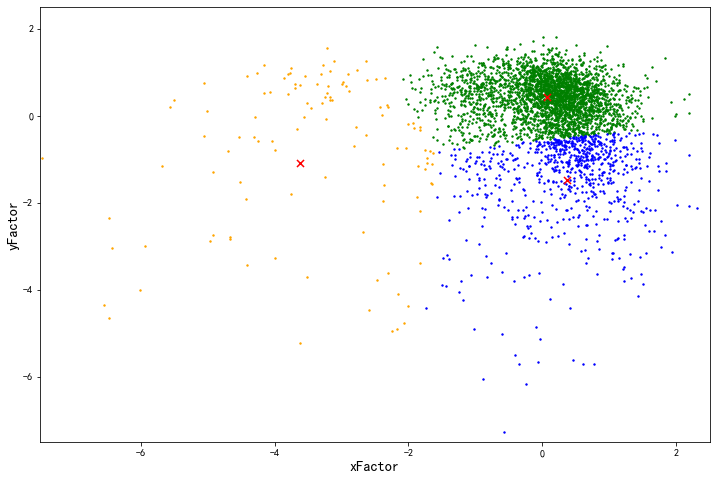

In [17]:
# kmeans

# 计算欧拉距离
def calcDis(dataSet, centroids, k):
    clalist=[]
    for data in dataSet:
        diff = np.tile(data, (k, 1)) - centroids  #相减   (np.tile(a,(2,1))就是把a先沿x轴复制1倍，即没有复制，仍然是 [0,1,2]。 再把结果沿y方向复制2倍得到array([[0,1,2],[0,1,2]]))
        squaredDiff = diff ** 2     #平方
        squaredDist = np.sum(squaredDiff, axis=1)   #和  (axis=1表示行)
        distance = squaredDist ** 0.5  #开根号
        clalist.append(distance) 
    clalist = np.array(clalist)  #返回一个每个点到质点的距离len(dateSet)*k的数组
    return clalist

# 计算质心
def classify(dataSet, centroids, k):
    # 计算样本到质心的距离
    clalist = calcDis(dataSet, centroids, k)
    # 分组并计算新的质心
    minDistIndices = np.argmin(clalist, axis=1)    #axis=1 表示求出每行的最小值的下标
    newCentroids = pd.DataFrame(dataSet).groupby(minDistIndices).mean() #DataFramte(dataSet)对DataSet分组，groupby(min)按照min进行统计分类，mean()对分类结果求均值
    newCentroids = newCentroids.values
 
    # 计算变化量
    changed = newCentroids - centroids
 
    return changed, newCentroids

# 使用k-means分类
def kmeans(dataSet, k):
    # 随机取质心
    centroids = random.sample(dataSet, k)
    
    # 更新质心 直到变化量全为0
    changed, newCentroids = classify(dataSet, centroids, k)
    while np.any(changed != 0):
        changed, newCentroids = classify(dataSet, newCentroids, k)
    centroids = sorted(newCentroids.tolist())   #tolist()将矩阵转换成列表 sorted()排序
 
    # 根据质心计算每个集群
    cluster = []
    clalist = calcDis(dataSet, centroids, k) #调用欧拉距离
    minDistIndices = np.argmin(clalist, axis=1)  
    for i in range(k):
        cluster.append([])
    for i, j in enumerate(minDistIndices):   #enymerate()可同时遍历索引和遍历元素
        cluster[j].append(dataSet[i]) 
    return centroids, cluster

result.columns = ['xFactor', 'yFactor','tagetFollowingFactor','targetPrecedingFactor',\
                   'precedingFactor', 'relaVFactor']
dataset = result.iloc[:, [0,1]]
dataset = dataset.values.tolist()
centroids, cluster = kmeans(dataset, 3)
# while len(cluster[0]) < 800 or len(cluster[1]) < 800 or len(cluster[2]) < 800:
#     print(len(cluster[0]),len(cluster[1]),len(cluster[2]))
#     centroids, cluster = kmeans(dataset, 3)
print('质心为：%s' % centroids)
# print('集群为：%s' % cluster)
plt.figure(figsize = (12,8))
k = 0 # 用来画图
cluster_0 = pd.DataFrame(columns=result.columns)
cluster_1 = pd.DataFrame(columns=result.columns)
cluster_2 = pd.DataFrame(columns=result.columns)
for i in cluster:
    for j in i:
        if k == 0:
            plt.scatter(j[0],-j[1], marker = 'o',color = 'orange', s = 2 ,label = '原始点')
            cluster_0 = pd.concat([cluster_0,result[(result.xFactor == j[0]) & (result.yFactor == j[1])]])
        elif k == 1:
            plt.scatter(j[0],-j[1], marker = 'o',color = 'green', s = 2,label = '原始点1')
            cluster_1 = pd.concat([cluster_1,result[(result.xFactor == j[0]) & (result.yFactor == j[1])]])
        else:
            plt.scatter(j[0],-j[1], marker = 'o',color = 'blue', s = 2,label = '原始点2')
            cluster_2 = pd.concat([cluster_2,result[(result.xFactor == j[0]) & (result.yFactor == j[1])]])
    k += 1
for j in range(len(centroids)):
    plt.scatter(centroids[j][0],-centroids[j][1],marker='x',color='red',s=50, label='质心')

plt.ylim(- 7.5,2.5)     # 设置y轴刻度范围
plt.xlim(-7.5, 2.5)
plt.xlabel("xFactor", fontsize="x-large")
plt.ylabel("yFactor", fontsize="x-large")
plt.savefig('kmeans_3720points_0.png')
# plt.show()

In [1021]:
# 从df_raw中得到三类点
df_raw.reset_index(drop = True,inplace=True)
df_raw.loc[cluster_0.index]

,x,xV,t,yV,aXV,rPX,rFX,rTPX,rTFX,rPXV,rFXV,rTPXV,rTFXV,pH,tPH,tFX
39,141.07,28.911789,123,0.633659,29.563735,0.005076,0.042990,0.005004,0.050199,2.009312,0.630775,0.928479,6.259024,6.783676,6.899802,1.049688
42,130.87,27.722857,119,0.680588,29.563735,0.013120,0.040416,0.012001,0.092028,5.456978,1.245549,0.726218,3.438993,2.746669,3.018306,0.545762
78,170.58,23.302228,184,0.441141,30.040320,0.005000,0.008104,0.005000,0.017488,5.455519,6.211781,7.882990,0.022391,8.565055,8.560288,2.452689
81,107.97,23.890877,114,0.684649,30.040320,0.030850,0.006536,0.035490,0.005000,2.090596,3.537087,2.073421,6.441330,1.377935,1.189294,6.199885
83,151.20,23.187622,164,0.442317,30.040320,0.008699,0.011010,0.010034,0.007036,5.390614,4.156895,0.093232,0.467866,4.949018,4.298173,6.008481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3671,133.44,22.848095,147,0.468844,29.365453,0.005406,0.018833,0.005000,0.027648,6.516925,6.868082,6.194971,3.022993,8.138624,8.819840,1.859735
3676,85.54,19.984074,108,0.812870,29.365453,0.032404,0.013346,0.034359,0.020548,5.742500,7.731944,5.490741,6.314864,1.742034,1.529439,2.286181
3677,143.89,21.034884,172,0.404128,29.365453,0.015730,0.012870,0.016321,0.005000,3.043198,4.751802,2.432093,8.199909,3.309354,3.033411,7.096600
3691,104.39,19.042391,138,0.558986,29.365453,0.011762,0.027337,0.068203,0.016630,10.025796,7.956231,4.098116,2.295580,4.310048,0.932396,2.832327


<function matplotlib.pyplot.show(close=None, block=None)>

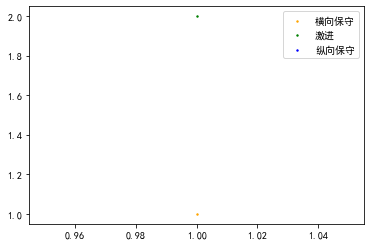

In [52]:
# 绘制图例
plt.scatter(1,1, marker = 'o',color = 'orange', s = 2 ,label = '横向保守')
plt.scatter(1,2, marker = 'o',color = 'green', s = 2,label = '激进')
plt.scatter(0,0, marker = 'o',color = 'blue', s = 2,label = '纵向保守')
plt.legend()
plt.show

In [46]:
# 储存三类点
cluster_raw_0 = df_raw.loc[cluster_0.index]
cluster_raw_1 = df_raw.loc[cluster_1.index]
cluster_raw_2 = df_raw.loc[cluster_2.index]
cluster_raw_0.to_csv('./kmeans_result/x保守.csv')
cluster_raw_1.to_csv('./kmeans_result/激进.csv')
cluster_raw_2.to_csv('./kmeans_result/y保守.csv')
pd.DataFrame()
print(pd.DataFrame([np.mean(cluster_raw_0,axis = 0),cluster_raw_1.mean(),cluster_raw_2.mean()]))

NameError: name 'cluster_0' is not defined

<AxesSubplot:>

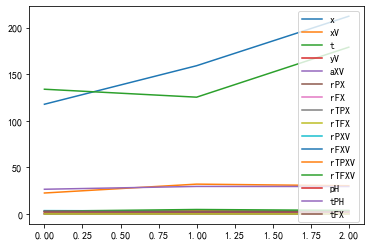

In [70]:
cluster_0=pd.read_csv('./kmeans_result/x保守.csv',index_col=0)
cluster_1=pd.read_csv('./kmeans_result/激进.csv',index_col=0)
cluster_2=pd.read_csv('./kmeans_result/y保守.csv',index_col=0)
pd.DataFrame([np.mean(cluster_0,axis = 0),cluster_1.mean(),cluster_2.mean()]).plot()

In [73]:
cluster_0['cluster'] = 0
cluster_1['cluster'] = 1
cluster_2['cluster'] = 2
cluster = pd.concat([cluster_0,cluster_1,cluster_2])

C:\Users\JYB\AppData\Local\Temp/ipykernel_3476/3161458601.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_0['t'],color='orange',hist=False)
C:\Users\JYB\AppData\Local\Temp/ipykernel_3476/3161458601.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cluster_1['t']

<AxesSubplot:xlabel='t', ylabel='Density'>

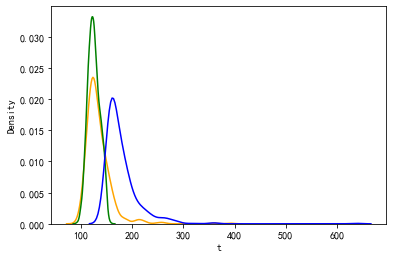

In [123]:
#绘制密度分布图
import seaborn as sns
#fig,axes = plt.subplots(3,1)
# sns.displot( 
#   data=cluster_0, 
#   x="xV", 
#   #hue="cluster",
#   kind="kde", 
#   height=6, 
#   aspect=1.4, 
#   log_scale=10,
#   ax = axes[1]
# )
# sns.distplot(cluster_0['xV'],hist=False,ax=axes[0])
# sns.distplot(cluster_1['xV'],hist=False,ax=axes[0])
# sns.distplot(cluster_2['xV'],hist=False,ax=axes[0]) 

sns.distplot(cluster_0['t'],color='orange',hist=False)
sns.distplot(cluster_1['t'],color='green',hist=False)
sns.distplot(cluster_2['t'],color='blue',hist=False)


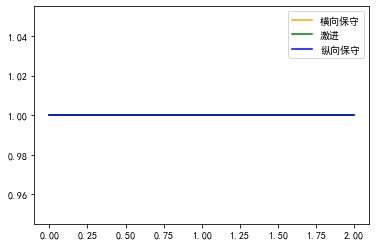

In [124]:
# 绘制密度分布图图例
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
x = [0,1,2]
y = [1,1,1]
plt.plot(x,y,c='orange')
plt.plot(x,y,c='green')
plt.plot(x,y,c='blue')
plt.legend(labels=['横向保守','激进','纵向保守'])
plt.show()

In [57]:
cluster_2

,Unnamed: 0,x,xV,t,yV,aXV,rPX,rFX,rTPX,rTFX,rPXV,rFXV,rTPXV,rTFXV,pH,tPH,tFX
0,9,177.52,24.251467,184,0.401793,30.111140,0.039851,0.036712,0.063918,0.058464,3.040404,3.420295,0.500092,0.634511,1.028963,0.647645,0.730489
1,12,171.46,26.960438,160,0.584500,30.111140,0.051951,0.007105,0.063181,0.015303,0.620961,0.366711,3.907812,7.995063,0.727616,0.696156,1.943124
2,21,288.62,32.359732,224,0.331339,30.111140,0.010334,0.008573,0.089721,0.033254,3.176684,0.968300,0.816846,0.000804,2.917355,0.357488,0.932113
3,34,188.47,29.629500,160,0.460562,29.563735,0.013739,0.006099,0.020447,0.007695,2.605845,1.495905,0.412920,8.547563,2.483005,1.652004,3.450514
4,35,239.39,36.060000,167,0.426647,29.563735,0.012106,0.008899,0.006114,0.005000,8.708481,5.074290,3.603690,6.024495,2.328347,4.544645,6.298842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,3702,180.95,29.191538,156,0.425128,29.365453,0.007753,0.012490,0.023632,0.023568,2.753614,5.576316,2.396888,1.044808,4.394178,1.464458,1.525311
544,3708,186.17,31.024040,151,0.392583,29.365453,0.023137,0.009687,0.008218,0.045128,2.569536,0.023787,2.691638,4.216954,1.900242,3.940951,0.913560
545,3711,315.83,21.986194,360,0.191500,29.365453,0.037237,0.027649,0.017592,0.005024,2.344975,6.065257,1.916303,5.416219,1.359603,2.944767,7.944043
546,3713,221.24,25.488532,218,0.365505,29.365453,0.036584,0.023726,0.020953,0.044470,5.218753,2.998202,1.533028,1.833945,1.191178,1.891368,1.001985
